In [61]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
# root_dir = r"D:\jack.lh.meng@gmail.com\spinup_data\ddpg_n_step_Roboschool"
# root_dir = r"D:\jack.lh.meng@gmail.com\spinup_data\ddpg_n_step_Roboschool_2L"
root_dir = r"D:\jack.lh.meng@gmail.com\spinup_data\ddpg_n_step_Roboschool_2L_NoDelayTrain_run1"
sub_dirs = os.listdir(root_dir)

In [63]:
task_names = ['RoboschoolAnt-v1','RoboschoolHalfCheetah-v1','RoboschoolHopper-v1','RoboschoolWalker2d-v1']
progress_files_path = {}
for task in task_names:
    progress_files_path[task]=[]
    
for i in range(len(sub_dirs)):
    dir_path = os.path.join(root_dir, sub_dirs[i])
    dir_path = os.path.join(dir_path, os.listdir(dir_path)[0])
    progress_path = os.path.join(dir_path, 'progress.txt')
    for task in task_names:
        if task in progress_path:
            progress_files_path[task].append(progress_path)
#     print(progress_path)

In [64]:
def plot_data(task_name='RoboschoolAnt-v1', replay_size=1000000):
    seeds = [0, 1, 2, 3]
    n_steps = [1, 2, 3, 4, 5]
    replay_sizes = [10000, 50000, 100000, 500000, 1000000]
    progress_data = {}
    for n_s in n_steps:
        for r_s in replay_sizes:
            progress_data['n_steps{}_replay_size{}'.format(n_s, r_s)] = []

    for file in progress_files_path[task_name]:
        params = file.split(task_name)[-1].split('_')[1:4]
        s, n_s, r_s = params[0], params[1], params[2]
        progress_data['n_steps{}_replay_size{}'.format(n_s, r_s)].append(pd.read_csv(file,  sep='\t'))
    #     print(params)

    averageEpRet = np.zeros((len(n_steps), 199))
    for n_s_i in range(len(n_steps)):
        for df in progress_data['n_steps{}_replay_size{}'.format(n_steps[n_s_i], replay_size)]:
            averageEpRet[n_s_i, :] += df['AverageTestEpRet']

    fig, axes = plt.subplots(1,1)
    legend = []
    for n_s_i in range(len(n_steps)):
        avg = averageEpRet[n_s_i, :]/4
        std = np.std(averageEpRet[n_s_i, :], axis=0)
        axes.plot(avg)
        axes.fill_between(np.arange(199), avg-std/4, avg+std/4, alpha=0.1)
        legend.append('n_step: {}'.format(n_steps[n_s_i]))
    
    axes.set_ylabel('Average Accumulated Reward')
    axes.set_xlabel('Epochs')
    axes.legend(legend)  
    axes.set_title('{}\nReplay Size: {}'.format(task_name, replay_size))
    fig.savefig('./figures/Roboschool/{0}_ReplaySize_{1}_2L_NoDelayTrain'.format(task_name, replay_size), dpi=300)

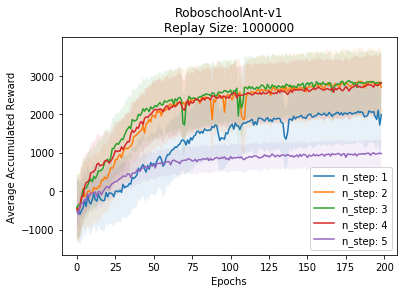

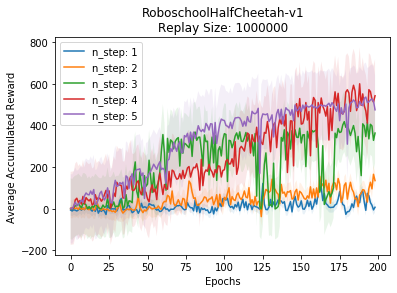

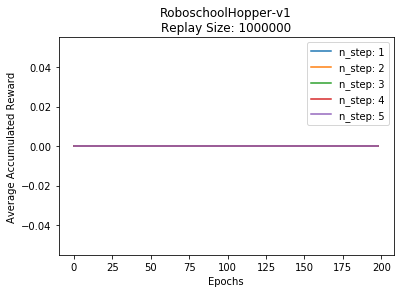

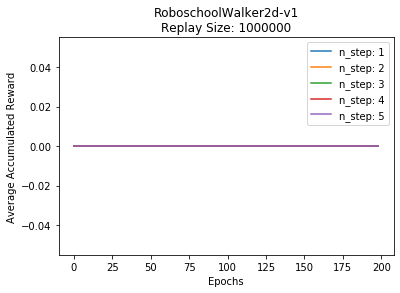

In [65]:
plot_data(task_name='RoboschoolAnt-v1', replay_size=1000000)
plot_data(task_name='RoboschoolHalfCheetah-v1', replay_size=1000000)
plot_data(task_name='RoboschoolHopper-v1', replay_size=1000000)
plot_data(task_name='RoboschoolWalker2d-v1', replay_size=1000000)


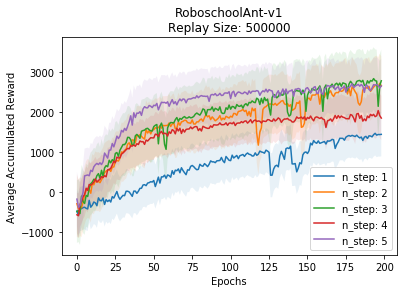

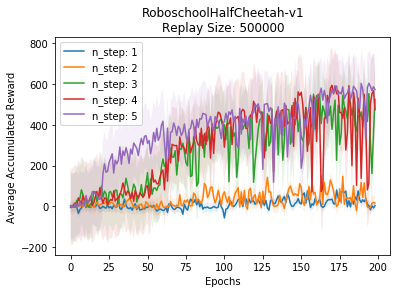

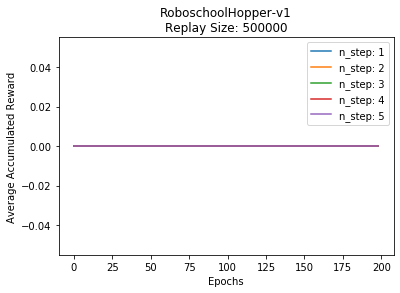

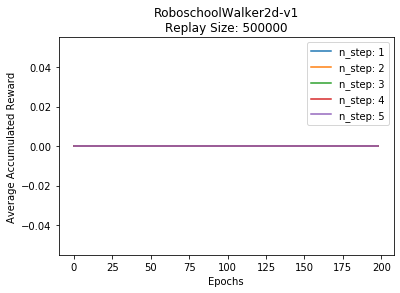

In [66]:
replay_size=500000
plot_data(task_name='RoboschoolAnt-v1', replay_size=replay_size)
plot_data(task_name='RoboschoolHalfCheetah-v1', replay_size=replay_size)
plot_data(task_name='RoboschoolHopper-v1', replay_size=replay_size)
plot_data(task_name='RoboschoolWalker2d-v1', replay_size=replay_size)


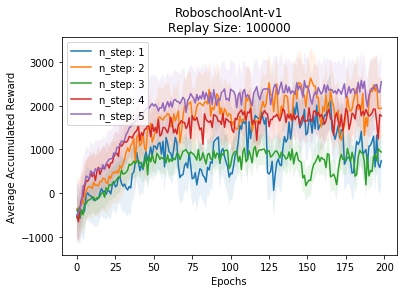

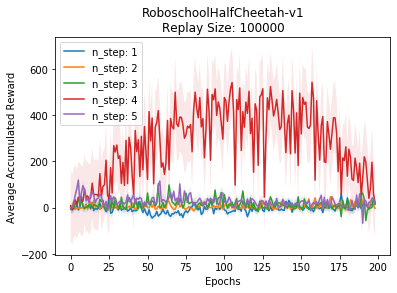

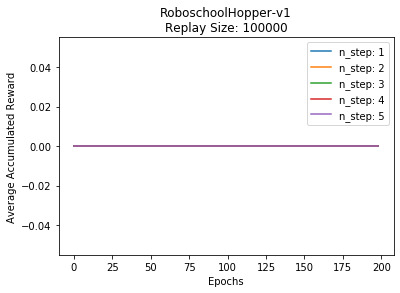

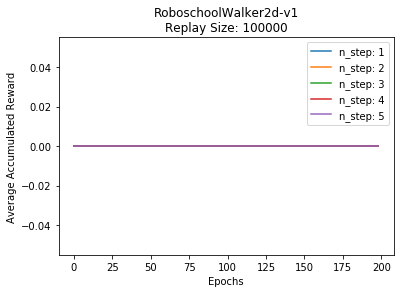

In [67]:
replay_size=100000
plot_data(task_name='RoboschoolAnt-v1', replay_size=replay_size)
plot_data(task_name='RoboschoolHalfCheetah-v1', replay_size=replay_size)
plot_data(task_name='RoboschoolHopper-v1', replay_size=replay_size)
plot_data(task_name='RoboschoolWalker2d-v1', replay_size=replay_size)


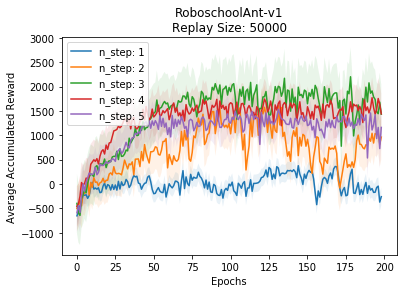

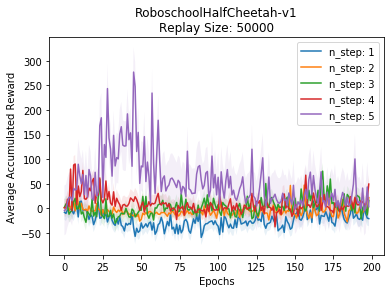

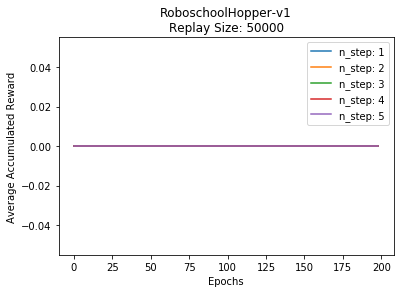

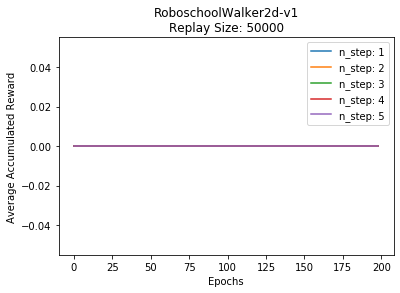

In [68]:
replay_size=50000
plot_data(task_name='RoboschoolAnt-v1', replay_size=replay_size)
plot_data(task_name='RoboschoolHalfCheetah-v1', replay_size=replay_size)
plot_data(task_name='RoboschoolHopper-v1', replay_size=replay_size)
plot_data(task_name='RoboschoolWalker2d-v1', replay_size=replay_size)


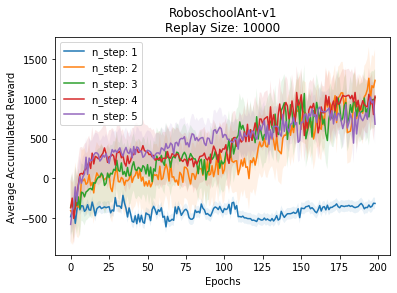

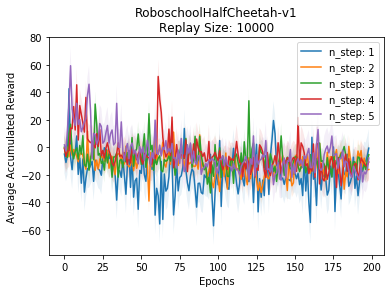

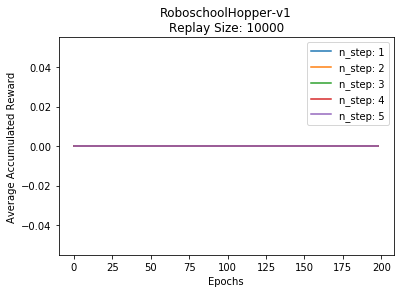

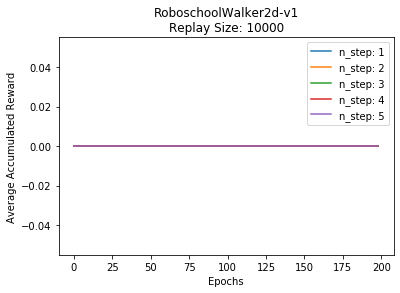

In [69]:
replay_size=10000
plot_data(task_name='RoboschoolAnt-v1', replay_size=replay_size)
plot_data(task_name='RoboschoolHalfCheetah-v1', replay_size=replay_size)
plot_data(task_name='RoboschoolHopper-v1', replay_size=replay_size)
plot_data(task_name='RoboschoolWalker2d-v1', replay_size=replay_size)
